In [94]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn .metrics import mean_absolute_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [95]:
df=pd.read_csv("data.csv",sep="\t")
df.head()

,country,surveyelapse,GS1,GS2,GS3,GS4,GS5,GS6,GS7,GS8,...,O7,O8,O9,O10,operatingsystem,browser,screenw,screenh,introelapse,testelapse
0,RO,174,1,1,3,3,3,2,3,1,...,5,4,5,4,Windows,Chrome,1366,768,69590,307
1,US,120,2,2,3,3,2,1,3,3,...,4,3,4,5,Macintosh,Chrome,1280,800,33657,134
2,US,99,3,3,3,3,4,3,4,4,...,5,5,4,4,Windows,Firefox,1920,1080,95550,138
3,KE,5098,1,3,4,2,4,1,5,4,...,4,2,5,4,Windows,Chrome,1600,900,4,4440
4,JP,340,1,2,3,3,2,2,2,4,...,4,1,3,2,Windows,Firefox,1920,1080,3,337


In [96]:
df.dropna()
df.head()

,country,surveyelapse,GS1,GS2,GS3,GS4,GS5,GS6,GS7,GS8,...,O7,O8,O9,O10,operatingsystem,browser,screenw,screenh,introelapse,testelapse
0,RO,174,1,1,3,3,3,2,3,1,...,5,4,5,4,Windows,Chrome,1366,768,69590,307
1,US,120,2,2,3,3,2,1,3,3,...,4,3,4,5,Macintosh,Chrome,1280,800,33657,134
2,US,99,3,3,3,3,4,3,4,4,...,5,5,4,4,Windows,Firefox,1920,1080,95550,138
3,KE,5098,1,3,4,2,4,1,5,4,...,4,2,5,4,Windows,Chrome,1600,900,4,4440
4,JP,340,1,2,3,3,2,2,2,4,...,4,1,3,2,Windows,Firefox,1920,1080,3,337


In [97]:
targets=["N1","N2","N3","N4","N5","N6","N7","N8","N9","N10"]
df["Neuroticism"]=df[targets].mean(axis=1)


In [98]:
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))                       #Normalization (Min-Max Scaling)


In [114]:
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))              #Standardization (Z-score)
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))


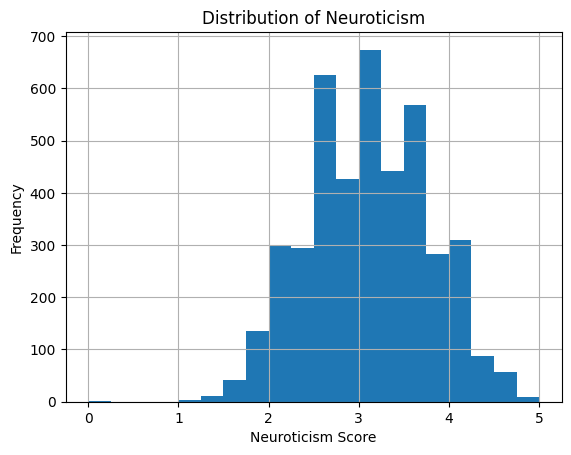

In [100]:
df['Neuroticism'].hist(bins=20)
plt.xlabel('Neuroticism Score')
plt.ylabel('Frequency')
plt.title('Distribution of Neuroticism')
plt.show()

In [101]:
corr=df.select_dtypes(include='number').corr()
# sns.heatmap(corr,annot=True,cmap='coolwarm')
print(corr['Neuroticism'].sort_values(ascending=False))       #relationship 
# plt.show()

Neuroticism    1.000000
N6             0.773784
N8             0.773100
N7             0.751657
N9             0.746319
                 ...   
E3            -0.277243
GS5           -0.280478
GS7           -0.297510
N2            -0.311011
GS8           -0.330190
Name: Neuroticism, Length: 96, dtype: float64


In [102]:
X=df[["education","urban","gender","orientation","race"]]
y=df["Neuroticism"]                                  #features

In [103]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [104]:
model=RandomForestRegressor(random_state=42)
model.fit(X_train,y_train)              #Algorithm

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [105]:
y_pred=model.predict(X_test)
print("MSE",mean_absolute_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

MSE 0.5200527025219531
R2 score 0.0085739626895589


In [106]:
importances = model.feature_importances_
feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, importances))

print("Feature Importances:")
for feature, importance in feature_importance_dict.items():
    print(f"{feature}: {importance:.4f}")


Feature Importances:
education: 0.2043
urban: 0.1882
gender: 0.1457
orientation: 0.2312
race: 0.2307


In [107]:
feature_importance_dict = dict(zip(feature_names, importances))
sorted_importances = dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True))

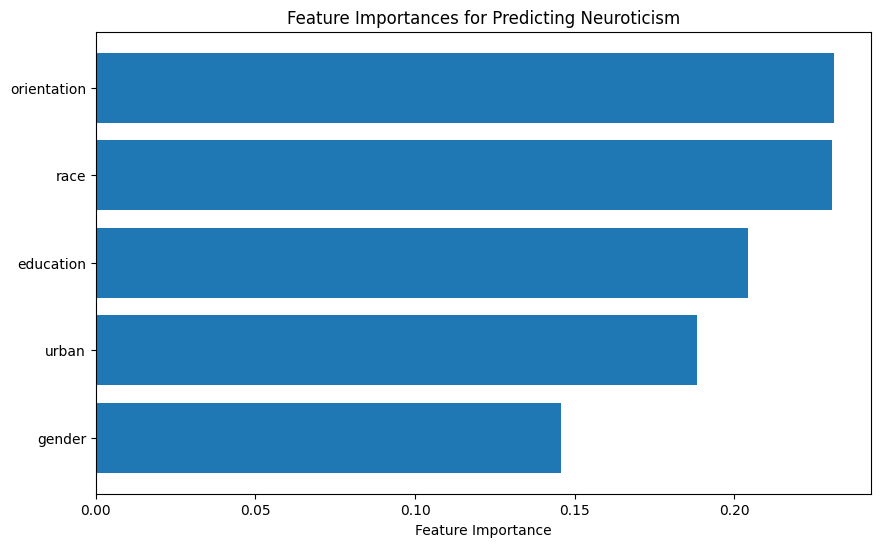

In [ ]:
plt.figure(figsize=(10,6))
plt.barh(list(sorted_importances.keys()), list(sorted_importances.values()))
plt.xlabel("Feature Importance")
plt.title("Feature Importances for Predicting Neuroticism")
plt.gca().invert_yaxis()  # show the most importent feature
plt.show()

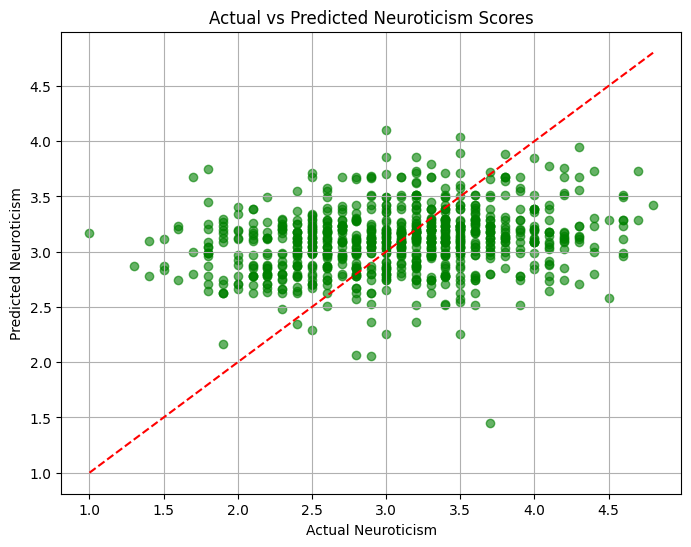

In [116]:

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.xlabel("Actual Neuroticism")
plt.ylabel("Predicted Neuroticism")
plt.title("Actual vs Predicted Neuroticism Scores")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.grid(True)
plt.show()


In [110]:
y_test

1703    4.1
1173    3.0
308     4.8
1322    4.4
3271    3.4
       ... 
912     3.0
443     4.0
1483    4.0
668     1.6
1114    2.9
Name: Neuroticism, Length: 854, dtype: float64

In [111]:
y_pred

array([3.04086427, 3.05745278, 3.42282427, 3.22875073, 3.49299385,
       3.04086427, 2.97351541, 3.14390912, 2.71183663, 3.19586158,
       3.17885606, 2.65905965, 3.20289301, 3.22875073, 2.94611059,
       2.78082669, 3.3845742 , 2.88091421, 3.29776667, 3.3845742 ,
       3.73296644, 3.49339478, 3.51540833, 3.19586158, 2.79775017,
       3.37269711, 3.08899592, 3.19586158, 2.28856287, 3.34397018,
       2.9942133 , 3.08665703, 2.63921746, 3.49299385, 3.42282427,
       2.87284946, 3.12537818, 3.28820092, 3.26008717, 3.26008717,
       3.22875073, 3.20289301, 3.19586158, 2.87363189, 3.70396805,
       3.02577224, 3.57455317, 3.22875073, 3.22875073, 3.22875073,
       3.49339478, 2.67173151, 2.78082669, 3.08899592, 2.84884829,
       2.84247229, 3.08665703, 3.17885606, 3.04461686, 3.28820092,
       3.1101369 , 3.19098333, 3.55177143, 3.28820092, 3.26265556,
       2.97351541, 3.1101369 , 2.7798628 , 3.19586158, 3.17116411,
       3.08899592, 3.17116411, 3.04086427, 3.16666106, 2.79775

In [112]:
model.predict([[3, 1, 4, 3,3 ]])

c:\Users\M_Wali\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([2.64455417])

In [113]:
X_train

,education,urban,gender,orientation,race
1675,3,2,2,1,4
1164,3,2,2,1,4
192,3,3,1,1,5
910,3,1,2,2,4
567,3,3,1,0,1
...,...,...,...,...,...
3444,2,2,2,1,4
466,2,3,2,1,1
3092,3,3,2,1,4
3772,3,2,2,1,4
